In [1]:
import numpy as np
import scipy as sp
import scipy.sparse as sps
import scipy.sparse.linalg as spsl
import numpy.linalg as npl
import scipy.linalg as spl
from numpy.fft import fft, ifft, fft2
from matplotlib import pyplot as plt
from pprint import pprint

In [2]:
def SMW_iteration(M, N, b, x, tol = 1.e-5, maxit = 100):
    # M, N : matrices such as A = M - N
    # M : is the first column of the circulant matrix M
    # N : is the sparse matrix N
    # x : guess of the solution
    
    err = 1.0
    iters = 0
#     cc = fft(M)
    xhist = []
    while (err > tol and iters < maxit):
        iters += 1
        c = N@x+b
#        xnew = fft(ifft(c)/cc).real
        xnew = spl.solve_circulant(M,c)
        err = npl.norm(xnew-x)
        x = np.copy(xnew)
        xhist.append(x)
        
    print('iterations required for convergence:', iters)
    
    return x, xhist

def get_spectral_radius(M:np.ndarray, N:np.ndarray):
    Minv = np.linalg.inv(M)
    G = Minv @ N
    D, V = np.linalg.eig(G)
    rho = max(abs(D))
    return rho

In [867]:
A =  np.array([[5.,3.,2.,2.],
               [1.,4.,3.,2.],
               [2.,1.,4.,3.],
               [4.,2.,1.,5.]])

N = sps.lil_matrix((4, 4))
N[0,0]=-1.0; N[3,0]=-1.0; N[0,3]=-1.0; N[3,3]=-1.0

Na = N.toarray()

U, S, Vh = np.linalg.svd(Na)
U = U @ np.diag(S)
M = (A + N.toarray())
Minv = np.linalg.inv(M)

### Proving Lemma 2.1 - It works
print("Lemma 2.1")
print(np.linalg.det(M - U @ Vh))
print(np.linalg.det(np.eye(4) - Vh @ Minv @ U ) * np.linalg.det(M))

### Proving theorem 2.1
D, V = np.linalg.eig(Minv @ Na)
rho = max(abs(D))
print("\nTheorem 2.1")
print(f"Spectral Radius = {rho}")
print(f"eigenvalues = {D}")
eig1 = -rho

det1 = np.linalg.det(Minv @ Na - eig1 * np.eye(4))
print("first det = ", det1) # Correctly 0

det2 = np.linalg.det(Minv @ U @ Vh - eig1 * np.eye(4))
print("second det = ", det2) # Correctly 0

det3 = np.linalg.det(-eig1 * Minv) 
det4 = np.linalg.det(M - U @ Vh / eig1)
det5 = det3 * det4
print("third det = ", det3, det4, det5) # Correctly 0

det6 = np.linalg.det(-eig1 * Minv) 
det7 = np.linalg.det(np.eye(4) - Vh @ Minv @ U / eig1)
det8 = np.linalg.det(M)
det9 = det6 * det7 *det8
print("fourth det = ", det6, det7, det8, det9) # Correctly 0

det10 = np.linalg.det(Vh @ Minv @ U - eig1 * np.eye(4))
print("fifth det = ", det10) # Correctly 0

D2, V2 = np.linalg.eig(Vh @ Minv @ U)
print(f"Compare eigs: {D}, {D2}")

print()
print(np.eye(4) - Minv @ Na)
print(np.linalg.inv(Minv @ Na - np.eye(4)))
print(f"norm of G: {np.linalg.norm(Minv @ Na)}")
print(Minv @ Na)
print(Minv)
# print(M)
# print(A)
# print(np.linalg.inv(A))

Lemma 2.1
216.00000000000006
216.00000000000014

Theorem 2.1
Spectral Radius = 0.35000000000000003
eigenvalues = [ 0.    0.   -0.35  0.  ]
first det =  0.0
second det =  2.3800406090401945e-18
third det =  9.378906249999997e-05 3.197442310920468e-14 2.998851167390641e-18
fourth det =  9.378906249999997e-05 1.1102230246251573e-16 160.00000000000009 1.6660284263281271e-18
fifth det =  2.3800406090401776e-18
Compare eigs: [ 0.    0.   -0.35  0.  ], [ 0.    0.    0.   -0.35]

[[ 1.3   0.    0.    0.3 ]
 [ 0.05  1.    0.    0.05]
 [-0.2   0.    1.   -0.2 ]
 [ 0.05  0.    0.    1.05]]
[[-0.77777778 -0.         -0.          0.22222222]
 [ 0.03703704 -1.         -0.          0.03703704]
 [-0.14814815 -0.         -1.         -0.14814815]
 [ 0.03703704 -0.         -0.         -0.96296296]]
norm of G: 0.5196152422706632
[[-0.3   0.    0.   -0.3 ]
 [-0.05  0.    0.   -0.05]
 [ 0.2   0.    0.    0.2 ]
 [-0.05  0.    0.   -0.05]]
[[ 0.275 -0.225  0.025  0.025]
 [ 0.025  0.275 -0.225  0.025]
 [ 0.025

In [659]:
# Analyzing the iteration matrix
G = Minv @ Na
print(f"Iteration Matrix: \n{G}\n")
D, V = np.linalg.eig(G)
rho = max(abs(D))
print(f"Spectral radius: {rho:.2f}\n")
print(f"I - G: \n{np.eye(4) - G}\n")
print(f"I - G is nonsingular: \n{np.linalg.inv(np.eye(4) - G)}\n")
Gsum = np.zeros((4,4))
for k in range(10):
    Gsum += np.linalg.matrix_power(G, k)
print(f"k={k}: \n{Gsum}\n")

# print(Gsum)

Iteration Matrix: 
[[-0.3   0.    0.   -0.3 ]
 [-0.05  0.    0.   -0.05]
 [ 0.2   0.    0.    0.2 ]
 [-0.05  0.    0.   -0.05]]

Spectral radius: 0.35

I - G: 
[[ 1.3   0.    0.    0.3 ]
 [ 0.05  1.    0.    0.05]
 [-0.2   0.    1.   -0.2 ]
 [ 0.05  0.    0.    1.05]]

I - G is nonsingular: 
[[ 0.77777778  0.          0.         -0.22222222]
 [-0.03703704  1.          0.         -0.03703704]
 [ 0.14814815  0.          1.          0.14814815]
 [-0.03703704  0.          0.          0.96296296]]

k=9: 
[[ 0.77776026  0.          0.         -0.22223974]
 [-0.03703996  1.          0.         -0.03703996]
 [ 0.14815982  0.          1.          0.14815982]
 [-0.03703996  0.          0.          0.96296004]]



Text(0.5, 1.0, 'SMW')

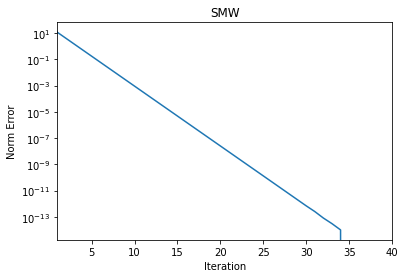

In [871]:
# Case 1
# b = np.random.randint(1, 5, (4, 1))
# xexact = np.linalg.solve(A, b)

# Case 2
# xexact = np.ones(4)
xexact = np.random.randint(1, 5, (4, 1))
b = A @ xexact

# initialize
err = 1.0
iters = 0
xhist = []
err = []
x = np.zeros(4)

# iterate
for i in range(40):
    c = N @ x + b
    xnew = spl.solve_circulant(M[:,0],c)
    xhist.append(xnew)
    err.append(npl.norm(A @ xnew - b))
    x = np.copy(xnew)

# plot
plt.semilogy(range(1,len(xhist)+1), err)
plt.xlabel("Iteration")
plt.ylabel("Norm Error")
plt.xlim(1, len(xhist))
plt.title("SMW")

iterations required for convergence: 22
1.6430435918957702e-09


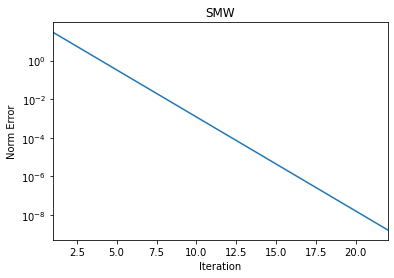

In [14]:
# Setup of the problem - Assembly of matrices and vectors

n = 1000 # This is the dimension of the system
M = np.zeros(n)
M[0] = 16
M[1] = -5
M[-1] = -5
M = M/6.0

N = sps.lil_matrix((n,n))
N[0,0]=8.0; N[n-1,n-1]=8.0; N[0,-1]=-5.0; N[n-1,0]=-5.0;
N = N/6.0

A = spl.circulant(M) - N.toarray()
# xexact = 2*np.ones(n)
xexact = np.random.randint(1, 5, (n, 1))
b = A@xexact

# x0 = initial guess

x0 = np.zeros(n)
x, xhist = SMW_iteration(M, N, b, x0, tol = 1.e-8, maxit = 30)

# print('The error is:', npl.norm(x-xexact))
# print(get_spectral_radius(M, N))
error = [np.linalg.norm(A@p - b) for p in xhist]
plt.semilogy(range(1,len(xhist)+1), error)
plt.xlabel("Iteration")
plt.ylabel("Norm Error")
plt.xlim(1, len(xhist))
plt.title("SMW")
print(error[-1])
# print(x)
# print(xexact)

[[4.06322325 1.99011305 2.10815671 2.90875237 2.04196192]
 [1.99011305 3.06617439 0.98045613 1.50426451 2.32961624]
 [2.10815671 0.98045613 2.02392944 1.50698984 2.0474515 ]
 [2.90875237 1.50426451 1.50698984 4.39021266 2.26270087]
 [2.04196192 2.32961624 2.0474515  2.26270087 3.76053636]]
[[1 5 4 3 2]
 [2 1 5 4 3]
 [3 2 1 5 4]
 [4 3 2 1 5]
 [5 4 3 2 1]]
[[ 3.06322325 -3.00988695 -1.89184329 -0.09124763  0.04196192]
 [-0.00988695  2.06617439 -4.01954387 -2.49573549 -0.67038376]
 [-0.89184329 -1.01954387  1.02392944 -3.49301016 -1.9525485 ]
 [-1.09124763 -1.49573549 -0.49301016  3.39021266 -2.73729913]
 [-2.95803808 -1.67038376 -0.9525485   0.26270087  2.76053636]]
iterations required for convergence: 100
1.718447323614728


Text(0.5, 1.0, 'SMW')

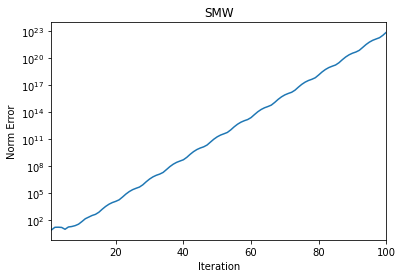

In [5]:
n = 5
# A =  np.random.randint(10, size=(N, N)) + np.eye(N)
A =  np.random.rand(n, n) + np.eye(n)
A = A.T @ A

M = sp.linalg.circulant([1, 2, 3, 4, 5])
N = A - M

# U, S, Vh = np.linalg.svd(A)

# uvt = U @ Vh
# print(U @ Vh)

# M = A + uvt
print(A)
print(M)
print(N)

xexact = np.ones(n)
b = A@xexact
x0 = np.zeros(n)
x, xhist = SMW_iteration(M[0], N, b, x0, tol = 1.e-6, maxit = 100)
error = [np.linalg.norm(A@p - b) for p in xhist]

print(get_spectral_radius(M, N))

plt.semilogy(range(1,len(xhist)+1), error)
plt.xlabel("Iteration")
plt.ylabel("Norm Error")
plt.xlim(1, len(xhist))
plt.title("SMW")

In [6]:
n = 5
A =  np.random.randint(5, size=(n, n)) + np.eye(N)
A = A.T * A

print(A)
e, v = np.linalg.eig(A)
print(e)

omega = np.exp(2 * np.pi * 1j / n)
O = np.diag([omega**i for i in range(n)])
print(omega)

F = np.zeros((n,n), dtype=complex)
for i in range(n):
    for j in range(n):
        F[i, j] = omega ** (i * j)

F *= 1/np.sqrt(n)
PI = F @ O @ F.conj().T
print(abs(PI) > 1e-5)

Q = np.diag(np.ones(4), 1) + np.diag(np.ones(1), -4)
print(Q)
print(np.linalg.matrix_power(Q,3))

TypeError: only integer scalar arrays can be converted to a scalar index

[26.00205129223615, 20.00274810126805, 32.00189941113213, 24.002193566105294, 24.002355690944608, 24.002563108799222, 32.00173604074932, 20.00258372634256, 26.00238172985926, 61.00238037126625]
iterations required for convergence: 100
1.999999995868941


Text(0.5, 1.0, 'SMW')

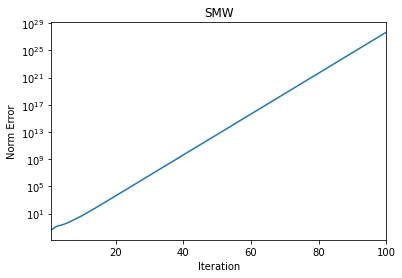

In [ ]:
n = 10
# A =  np.random.randint(10, size=(n, n)) + np.eye(n)
# A = A.T * A

A = sp.linalg.circulant(np.random.randint(5, size=(n, 1)))
A = A.T @ A
pertubation = 0.01*np.random.rand(n, 1) @ np.random.rand(n, 1).T
# print(A)
A = A + pertubation
# A[0,0] = 1
# A[n-1,0] = 1
# A[0,n-1] = 1
# A[n-1,n-1] = 1

# print(pertubation)
# print(A)
Q = np.diag(np.ones(n-1), 1) + np.diag(np.ones(1), 1-n)
# print(Q)
# print(np.linalg.matrix_power(Q,3))
# print(A)
c = [np.trace(A.T @ np.linalg.matrix_power(Q,i))/n for i in range(1, n+1)]
print(c)

M = sp.linalg.circulant(c)
N = A - M

# print(A)
# print(M)
# print(N)

xexact = np.ones(n)
b = A@xexact
x0 = np.zeros(n)
x, xhist = SMW_iteration(M[0], N, b, x0, tol = 1.e-6, maxit = 100)
error = [np.linalg.norm(A@p - b) for p in xhist]

print(get_spectral_radius(M, N))

plt.semilogy(range(1,len(xhist)+1), error)
plt.xlabel("Iteration")
plt.ylabel("Norm Error")
plt.xlim(1, len(xhist))
plt.title("SMW")

In [878]:
# Generate A
n = 4
A = np.random.randint(5, size=(n, n)) + np.eye(n)
# A = np.random.rand(n, n) 
# A = sp.linalg.circulant(np.random.randint(5, size=(n, 1)))
# A = A.T @ A
# pertubation = 0.01*np.random.rand(n, 1) @ np.random.rand(n, 1).T
# A = A + pertubation


# Calculate how close it is to circulant
Q = np.diag(np.ones(n-1), 1) + np.diag(np.ones(1), 1-n)
c = [np.trace(A.T @ np.linalg.matrix_power(Q,i))/n for i in range(1, n+1)]
d = [c[(i-1) % n] for i in range(n)]
print(f"Circulant Basis: {d}")
M = sp.linalg.circulant(d).T
N = A - M

# print(A)
# print(M)
# print(N)


# Calculate UV^T
U, S, Vh = np.linalg.svd(N)
U = U @ np.diag(S)
print(f"svd: {S}")

Minv = np.linalg.inv(M)

### Proving Lemma 2.1 - It works
print("Lemma 2.1")
print(np.linalg.det(M - U @ Vh))
print(np.linalg.det(np.eye(n) - Vh @ Minv @ U ) * np.linalg.det(M))

### Proving theorem 2.1
D, V = np.linalg.eig(Minv @ N)
rho = max(abs(D))
print("\nTheorem 2.1")
print(f"Spectral Radius = {rho}")
print(f"eigenvalues = {D}")
eig1 = -rho

det1 = np.linalg.det(Minv @ N - eig1 * np.eye(n))
print("first det = ", det1) # Correctly 0

det2 = np.linalg.det(Minv @ U @ Vh - eig1 * np.eye(n))
print("second det = ", det2) # Correctly 0

det3 = np.linalg.det(-eig1 * Minv) 
det4 = np.linalg.det(M - U @ Vh / eig1)
det5 = det3 * det4
print("third det = ", det3, det4, det5) # Correctly 0

det6 = np.linalg.det(-eig1 * Minv) 
det7 = np.linalg.det(np.eye(n) - Vh @ Minv @ U / eig1)
det8 = np.linalg.det(M)
det9 = det6 * det7 *det8
print("fourth det = ", det6, det7, det8, det9) # Correctly 0

det10 = np.linalg.det(Vh @ Minv @ U - eig1 * np.eye(n))
print("fifth det = ", det10) # Correctly 0

D2, V2 = np.linalg.eig(Vh @ Minv @ U)
print(f"Compare eigs: {np.sort(D)}, {np.sort(D2)}")

Da, Va = np.linalg.eig(A)
print(f"spectral radius A: {np.max(np.abs(Da))}")
print(f"spectral radius Minv N: {np.max(np.abs(D))}")

print(f"spectrum: {np.sort(Da)}")

# iteration matrix properties
G = Minv @ N
Grho = rho
print()
print(f"Spectral Radius of G: {Grho}")

print(np.linalg.inv(np.eye(n) - G))

Circulant Basis: [2.25, 2.0, 2.0, 0.25]
svd: [2.61638831 2.48517474 0.67987343 0.12724342]
Lemma 2.1
40.25
40.24999999999997

Theorem 2.1
Spectral Radius = 0.5019061405325438
eigenvalues = [-0.24216049+0.43962264j -0.24216049-0.43962264j  0.30279851+0.j
  0.18152247+0.j        ]
first det =  0.14339382662929998
second det =  0.1433938266293001
third det =  0.0015620562261785163 91.79812110867813 0.14339382662930017
fourth det =  0.0015620562261785163 2.2596460580597673 40.62499999999998 0.14339382662929995
fifth det =  0.1433938266293001
Compare eigs: [-0.24216049-0.43962264j -0.24216049+0.43962264j  0.18152247+0.j
  0.30279851+0.j        ], [-0.24216049-0.43962264j -0.24216049+0.43962264j  0.18152247+0.j
  0.30279851+0.j        ]
spectral radius A: 6.142832885235146
spectral radius Minv N: 0.5019061405325438
spectrum: [0.0967411 -1.71001913j 0.0967411 +1.71001913j 2.66368491+0.j
 6.14283289+0.j        ]

Spectral Radius of G: 0.5019061405325438
[[ 0.80590062 -0.25465839 -0.78881988  1

Text(0.5, 1.0, 'SMW')

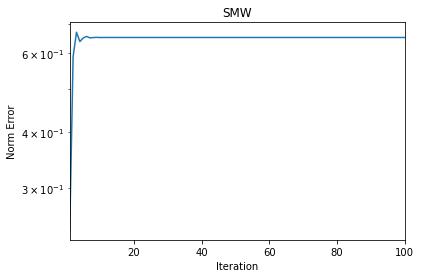

In [887]:
# Case 1
# b = np.random.randint(1, 5, (n, 1))
b = np.random.rand(n, 1)
xexact = np.linalg.solve(A, b)

# Case 2
# xexact = np.ones(n)
# xexact = np.random.randint(1, 5, (n, 1))
# b = A @ xexact

# initialize
iters = 0
xhist = []
err = []
x = np.zeros(shape=(4,1))
# x = np.random.rand(n)

# iterate
for i in range(100):
    c = N @ x + b
    xnew = spl.solve_circulant(M[:,0],c)
    xhist.append(xnew)
    err.append(npl.norm(A @ xnew - b))
    x = np.copy(xnew)

# plot
plt.semilogy(range(1,len(xhist)+1), err)
plt.xlabel("Iteration")
plt.ylabel("Norm Error")
plt.xlim(1, len(xhist))
plt.title("SMW")

In [708]:
# Generate A
n = 4
A = np.random.randint(-10, 10, size=(n, n)) + np.eye(n)
# A = np.random.rand(n, n) 
# A = sp.linalg.circulant(np.random.randint(5, size=(n, 1)))
# A = A.T @ A
# pertubation = 0.01*np.random.rand(n, 1) @ np.random.rand(n, 1).T
# A = A + pertubation
print(A)

###########
## Calculate how close it is to circulant
## Method 1
# Q = np.diag(np.ones(n-1), 1) + np.diag(np.ones(1), 1-n)
# c = [np.trace(A.T @ np.linalg.matrix_power(Q,i))/n for i in range(1, n+1)]
# d = [c[(i-1) % n] for i in range(n)]
# print(f"Circulant Basis: {np.sort(d)}")

# Method 2: Ensures Minv is nonnegative
Q = np.diag(np.ones(n-1), 1) + np.diag(np.ones(1), 1-n)
c = [np.min((A * np.linalg.matrix_power(Q,i)) @ np.ones((4,1))) for i in range(1, n)]
c.insert(0, np.min(np.diag(A)))
print(f"Circulant Basis: {c}")

###############
M = sp.linalg.circulant(d)
N = A - M

print(M)
print(np.linalg.inv(M))
print(N)

[[  9.   2.   6.   1.]
 [ -4.   7.   4.   9.]
 [-10.   3.   3.  -8.]
 [  6.  -5.  -4.  -8.]]
Circulant Basis: [-8.0, -8.0, -10.0, -4.0]
[[7. 1. 1. 2.]
 [2. 7. 1. 1.]
 [1. 2. 7. 1.]
 [1. 1. 2. 7.]]
[[ 0.15380835 -0.01375921 -0.00835381 -0.04078624]
 [-0.04078624  0.15380835 -0.01375921 -0.00835381]
 [-0.00835381 -0.04078624  0.15380835 -0.01375921]
 [-0.01375921 -0.00835381 -0.04078624  0.15380835]]
[[  2.   1.   5.  -1.]
 [ -6.   0.   3.   8.]
 [-11.   1.  -4.  -9.]
 [  5.  -6.  -6. -15.]]


In [889]:
# How can we construct a circulant matrix with a given set of eigenvalues

# Make an example circulant matrix and see if we can reconstruct the eigenvalues
n = 4
c = np.random.randint(1,10, size=(1,n))
print(f"initial c: {c}\n")
A = sp.linalg.circulant(c).T
print(f"initial A: \n{A} \n")

est_eig_A = []
omega = [np.exp(2 * np.pi * 1j * i/ n) for i in range(n)]
print("estimated eigs")
for i in range(n):
    est_eig_A.append(np.sum(c * [o ** i for o in omega]))
    print(f"i = {i}, eig = {est_eig_A[-1]}")

d, v = np.linalg.eig(A)
print(f"\ncalculated eigs:{d} \n")
# print(np.sort(d))


# Generate the eigenvectors
omega = np.exp(2 * np.pi * 1j / n)
O = np.diag([omega**i for i in range(n)])
# print(omega)

F = np.zeros((n,n), dtype=complex)
for i in range(n):
    for j in range(n):
        F[i, j] = omega ** (i * j)

# Correctly recreates eigenvalues
print(F @ c.T)

# Correctly recreates the circulant matrix
print(np.linalg.inv(F) @ est_eig_A)

cp = np.random.rand(4)
cp = [i + np.sqrt(1 - i **2) * np.random.rand(1)[0] * 1j for i in cp]

print()
print(np.linalg.inv(F) @ cp)

initial c: [[4 5 8 1]]

initial A: 
[[4 5 8 1]
 [1 4 5 8]
 [8 1 4 5]
 [5 8 1 4]] 

estimated eigs
i = 0, eig = (18+0j)
i = 1, eig = (-4+4.000000000000001j)
i = 2, eig = (6-9.797174393178828e-16j)
i = 3, eig = (-4-3.9999999999999973j)

calculated eigs:[18.+0.j  6.+0.j -4.+4.j -4.-4.j] 

[[18.+0.00000000e+00j]
 [-4.+4.00000000e+00j]
 [ 6.-9.79717439e-16j]
 [-4.-4.00000000e+00j]]
[4.-1.40865331e-15j 5.+1.85475275e-15j 8.+2.54671001e-16j
 1.-8.84467457e-16j]

[ 0.46020416+0.60333206j  0.22756798+0.01967882j -0.01735467+0.13729526j
 -0.12416118-0.18442942j]


In [925]:
print(A)
print(np.linalg.inv(A))

D = np.diag(fft(A[0,:]))
Ainv = np.linalg.inv(F).T @ np.linalg.inv(D) @ F.T
print(Ainv)



[[4 5 8 1]
 [1 4 5 8]
 [8 1 4 5]
 [5 8 1 4]]
[[-0.00694444 -0.09027778  0.11805556  0.03472222]
 [ 0.03472222 -0.00694444 -0.09027778  0.11805556]
 [ 0.11805556  0.03472222 -0.00694444 -0.09027778]
 [-0.09027778  0.11805556  0.03472222 -0.00694444]]
[[-0.00694444-3.46944695e-18j -0.09027778-1.32818306e-17j
   0.11805556-2.55134750e-17j  0.03472222-2.26463720e-18j]
 [ 0.03472222-1.04083409e-17j -0.00694444-1.74030744e-17j
  -0.09027778+1.51051341e-17j  0.11805556-2.91643398e-18j]
 [ 0.11805556+2.42861287e-17j  0.03472222-1.37027568e-17j
  -0.00694444-1.83619891e-18j -0.09027778+2.73217541e-17j]
 [-0.09027778-3.81639165e-17j  0.11805556+3.66777797e-17j
   0.03472222+1.91834337e-17j -0.00694444+1.37445756e-18j]]
